In [3]:
import pandas_datareader.data as web

In [4]:
import datetime

In [5]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2017,1,1)

In [7]:
facebook = web.DataReader('FB', 'google', start, end)

In [9]:
facebook.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-19,129.91,129.94,128.26,128.65,14958794
2016-09-20,128.65,129.17,128.03,128.64,11083808
2016-09-21,129.13,130.00,128.39,129.94,14068336
2016-09-22,130.50,130.73,129.56,130.08,15538307
2016-09-23,127.56,128.60,127.30,127.96,28326266


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from datetime import datetime

In [12]:
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [13]:
my_date = datetime(my_year, my_month, my_day)

In [14]:
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [3]:
import quandl

In [4]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [5]:
aapl = quandl.get('WIKI/AAPl')

In [6]:
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [7]:
aapl = quandl.get('WIKI/AAPl.11')

In [8]:
aapl.head()

,Adj. Close
Date,
1980-12-12,0.422706
1980-12-15,0.400652
1980-12-16,0.371246
1980-12-17,0.380362
1980-12-18,0.391536


In [11]:
aapl = quandl.get('WIKI/AAPl.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [13]:
aapl.iloc[0]['Adj. Close']

52.848786580038002

In [15]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [17]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [18]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


## Portfolio Allocation Example
### 30% in appl
### 20% in cisco
### 40% in amazon
### 10% in ibm

In [20]:
for stock_df, allo in zip((aapl, cisco, ibm, amzn), [.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [22]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [23]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [24]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [25]:
all_pos_vals = [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]

portfolio_val = pd.concat(all_pos_vals, axis=1)

In [26]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [27]:
portfolio_val.columns = ['AAPL Position', 'CISCO Position', 'IBM Position', 'AMZN Position']

In [28]:
portfolio_val.head()

,AAPL Position,CISCO Position,IBM Position,AMZN Position
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [29]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [30]:
portfolio_val.head()

,AAPL Position,CISCO Position,IBM Position,AMZN Position,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


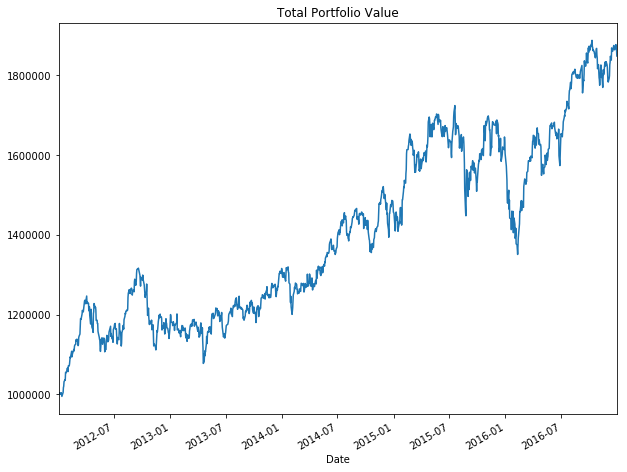

In [31]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

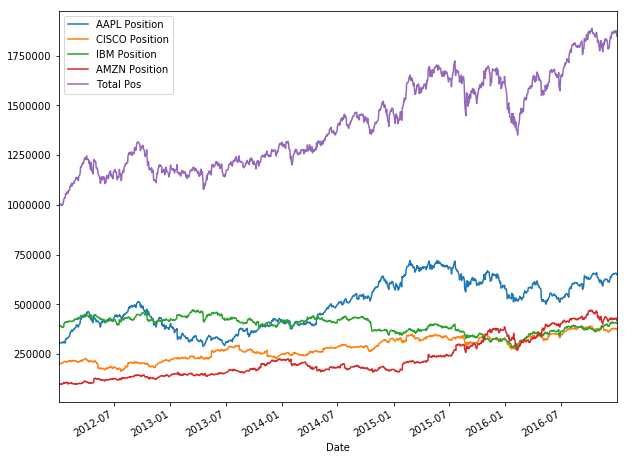

In [32]:
portfolio_val.plot(figsize=(10,8))

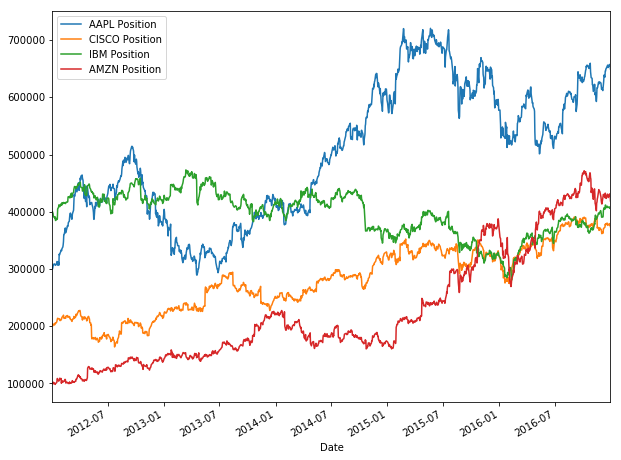

In [34]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(10,8))

In [35]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [36]:
portfolio_val.head()

,AAPL Position,CISCO Position,IBM Position,AMZN Position,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [37]:
portfolio_val['Daily Return'].mean()

0.0005442330716215277

In [38]:
portfolio_val['Daily Return'].std()

0.010568287769162039

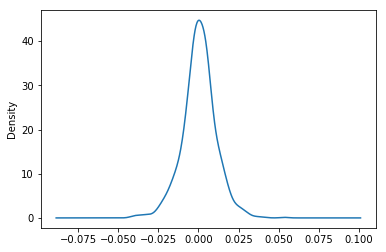

In [39]:
portfolio_val['Daily Return'].plot(kind='kde')

In [42]:
cumulative_return = (portfolio_val['Total Pos'][-1]/ portfolio_val['Total Pos'][0] - 1)* 100

In [43]:
cumulative_return

84.742851816655389

In [44]:
portfolio_val['Total Pos'][-1]

1847428.5181665539

In [45]:
# Sharpe Ratio

SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [46]:
SR

0.051496806626479666

In [47]:
ASR = (252**0.5)*SR

In [48]:
ASR

0.8174864618858897

In [49]:
# Sharpe ratio greater then 1 is acceptable, the higher the better